In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris=datasets.load_iris()

In [3]:
df=pd.DataFrame({'x': iris.data[:,0], 'y': iris.data[:,1], 'cluster': iris.target})

In [4]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [5]:
centroids = {}
for i in range(3):
  result_list = []
  result_list.append(df.loc[df['cluster'] == i]['x'].mean())
  result_list.append(df.loc[df['cluster'] == i]['y'].mean())
  centroids[i] = result_list

In [6]:
centroids

{0: [5.006, 3.428],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.974]}

Text(0, 0.5, 'Spea1 Width')

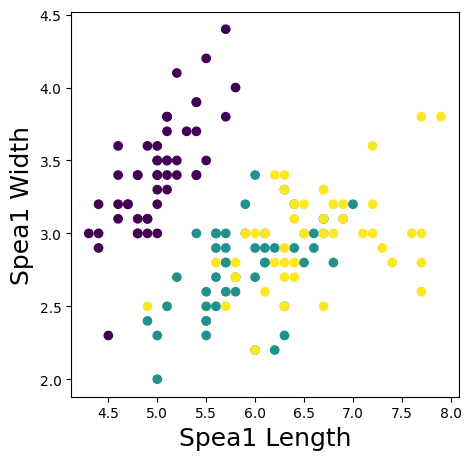

In [7]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=iris.target)
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Spea1 Width', fontsize=18)

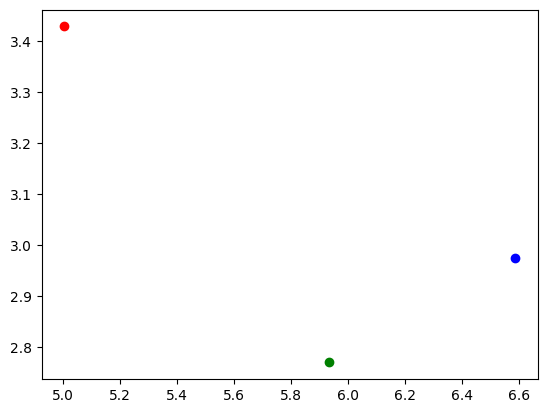

In [8]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in range(3):
  plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])
plt.show()

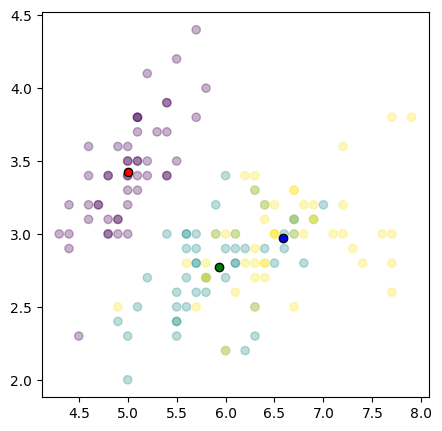

In [9]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], c=iris.target, alpha = 0.3)
colmap = {0: 'r', 1: 'g', 2: 'b'}
col = [0,1]
for i in centroids.keys():
  plt.scatter(centroids[i][0], centroids[i][1], c=colmap[i], edgecolor='k')
plt.show()

In [10]:
def assignment(df, centroids):
  for i in range(3):
    #sqrt((x1-x2)^2+(y1-y2)^2)
    df['distance_from_{}'.format(i)] = (
        np.sqrt(
            (df['x'] - centroids[i][0]) ** 2
            + (df['y'] - centroids[i][1]) ** 2
            )
        )
  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df

In [11]:
df = assignment(df, centroids)

In [12]:
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,b
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,g
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,b
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,b


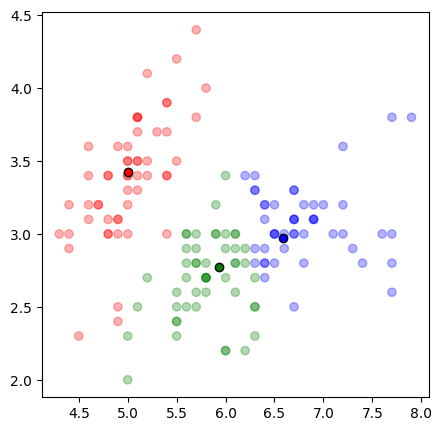

In [13]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha = 0.3)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')
plt.show()

In [14]:
def update(k):
  for i in range(3):
    centroids[i][0]=np.mean(df[df['closest']==i]['x'])
    centroids[i][1]=np.mean(df[df['closest']==i]['y'])
  return k

In [15]:
centroids = update(centroids)
centroids

{0: [5.009433962264151, 3.3830188679245285],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333333, 3.06875]}

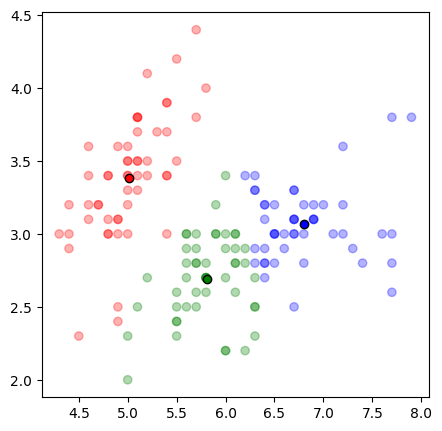

In [16]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha = 0.3)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')
plt.show()

In [17]:
while True:
  closest_centroids = df['closest'].copy(deep=True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break

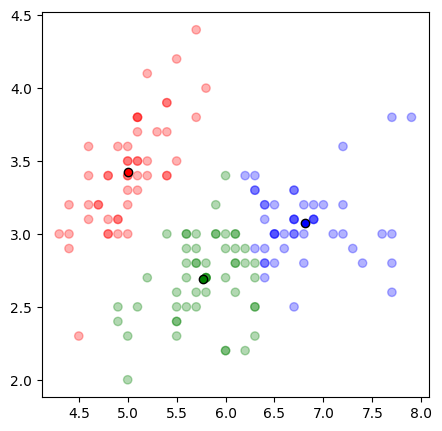

In [18]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha = 0.3)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')
plt.show()